Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

Then compile the Cartilage Sheet Simulation app using make.

In [1]:
%%bash
cd ../chaste_build/
make CartilageSheetSimulation

[  5%] Built target timekeeper
[ 15%] Built target chaste_global
[ 15%] Built target chaste_linalg
[ 21%] Built target chaste_io
[ 26%] Built target chaste_ode
[ 42%] Built target chaste_mesh
[ 47%] Built target chaste_pde
[ 94%] Built target chaste_cell_based
[100%] Built target chaste_project_cartilage
[100%] Built target CartilageSheetSimulation


Now run the simulation using (set the flags to correspond to your experimental setup)

In [27]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
#plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

In [2]:
output_directory = 'exp-fix_repulsive_strength_PWQ/' + time.strftime("%Y%m%d-%H%M%S")
flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 45.0' # final time 45h
flags = flags + ' --sw 10' # 10 cells in x direction
flags = flags + ' --sd 20' # 20 cells in y direction
flags = flags + ' --sh 1' # 1 cell in z direction
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0
flags = flags + ' --A 0.1' # 10% of stem cells activated
flags = flags + ' --F pwq' # PWQ force



In [3]:
mu_R_values = np.linspace(0.01, 20, 50)

In [4]:
list_of_flags = []
for mu_R in mu_R_values:
    direc = output_directory + '/' + str(mu_R) + '/'
    list_of_flags.append(' --output-dir '+direc + flags + ' --mu_R ' + str(mu_R))
de.run_simulations_list(list_of_flags=list_of_flags)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir exp-fix_repulsive_strength_PWQ/20200226-100314/0.01/ --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 0.0 --A 0.1 --F pwq --mu_R 0.01
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir exp-fix_repulsive_strength_PWQ/20200226-100314/0.417959183673/ --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 0.0 --A 0.1 --F pwq --mu_R 0.417959183673
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir exp-fix_repulsive_strength_PWQ/20200226-100314/0.825918367347/ --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 0.0 --A 0.1 --F pwq --mu_R 0.825918367347
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir exp-fix_repulsive_strength_PWQ/20200226-100314/1.23387755102/ --sbt --T 45.0 --sw 10 --sd 20 --s

Note that the output from the bash subprocesses gets printed in the shell running the jupyter notebook server - check there for error messages!

Then run postprocessing. Note that the post processing currently assumes a simulation run time until at least T=45.0. And if there's no upper boundary it will encounter All-NaN slices and print out warnings.

In [5]:
list_of_directories = []
for mu_R in mu_R_values:
    list_of_directories.append(output_directory + '/' + str(mu_R) + '/')
de.run_postprocessing_list(list_of_directories)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/0.01/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/0.417959183673/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/0.825918367347/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/1.23387755102/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/1.64183673469/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/2.04979591837/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/2.45775510204/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_resu

analysis/sheet_metrics.py:92: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:92: RuntimeWarning: All-NaN axis encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:93: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:93: RuntimeWarning: All-NaN axis encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:94: RuntimeWarning: All-NaN slice encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(coordinates[:,2::3], axis=1))
analysis/sheet_metrics.py:94: RuntimeWarning: All-NaN axis encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(c

Now we want to read in the relative column height at times t=35h and t=40h.

In [6]:
# time steps are consistent across runs, so it's sufficient to load them from a single path
times, coords = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+output_directory + '/' + str(mu_R) + '/0/results_from_time_0/') 
ind_t35 = np.where(times==35.0)[0][0] #what if we did not sample at this time???
ind_t40 = np.where(times==40.0)[0][0]

In [7]:
rch_t35 = []
rch_t40 = []
for direc in list_of_directories:
    rch = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+direc+'0/results_from_time_0/metrics_results/data_relative_column_height_av.txt', dtype=float)
    rch_t35.append(rch[ind_t35])
    rch_t40.append(rch[ind_t40])


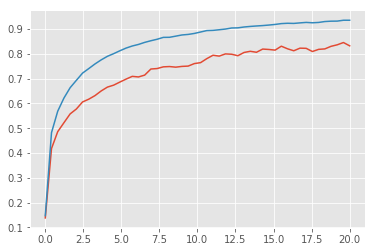

In [8]:
plt.plot(mu_R_values, rch_t35, mu_R_values, rch_t40)

In [9]:
mu_R_values = np.linspace(20.01, 40, 50)

In [10]:
list_of_flags = []
for mu_R in mu_R_values:
    direc = output_directory + '/' + str(mu_R) + '/'
    list_of_flags.append(' --output-dir '+direc + flags + ' --mu_R ' + str(mu_R))
de.run_simulations_list(list_of_flags=list_of_flags)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir exp-fix_repulsive_strength_PWQ/20200226-100314/20.01/ --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 0.0 --A 0.1 --F pwq --mu_R 20.01
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir exp-fix_repulsive_strength_PWQ/20200226-100314/20.4179591837/ --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 0.0 --A 0.1 --F pwq --mu_R 20.4179591837
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir exp-fix_repulsive_strength_PWQ/20200226-100314/20.8259183673/ --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 0.0 --A 0.1 --F pwq --mu_R 20.8259183673
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --S 0 --output-dir exp-fix_repulsive_strength_PWQ/20200226-100314/21.233877551/ --sbt --T 45.0 --sw 10 --sd 20 --sh 1

In [11]:
list_of_directories = []
for mu_R in mu_R_values:
    list_of_directories.append(output_directory + '/' + str(mu_R) + '/')
de.run_postprocessing_list(list_of_directories)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/20.01/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/20.4179591837/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/20.8259183673/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/21.233877551/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/21.6418367347/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/22.0497959184/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-fix_repulsive_strength_PWQ/20200226-100314/22.457755102/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results

analysis/sheet_metrics.py:92: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:92: RuntimeWarning: All-NaN axis encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:93: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:93: RuntimeWarning: All-NaN axis encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:94: RuntimeWarning: All-NaN slice encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(coordinates[:,2::3], axis=1))
analysis/sheet_metrics.py:94: RuntimeWarning: All-NaN axis encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(c

In [12]:
for direc in list_of_directories:
    rch = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+direc+'0/results_from_time_0/metrics_results/data_relative_column_height_av.txt', dtype=float)
    rch_t35.append(rch[ind_t35])
    rch_t40.append(rch[ind_t40])

In [20]:
mu_R_values =  list(np.linspace(0.01, 20, 50)) + list(np.linspace(20.01, 40, 50))

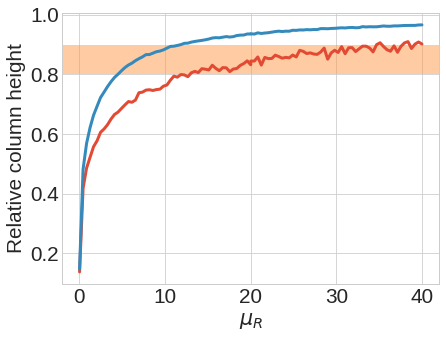

In [32]:
plt.plot(mu_R_values, rch_t35, mu_R_values, rch_t40)
plt.axhspan(0.8, 0.9, facecolor='#FF9848', alpha=0.5)  
plt.xlabel('$\mu_R$')
plt.ylabel('Relative column height')
plt.savefig('rch.pdf',bbox_inches='tight')

In [21]:
# general polynomial
def piecewise_polynomial(r, muA=0.0, muR=10.0, rA=1.5, rR=1.2, n=1.0, p=1.0):
    """
    Piecewise polynomial force function

    Parameters:
      muA: spring stiffness coefficient for adhesion, default 1.0
      muR: spring stiffness coefficient for repulsion, default 1.0
      rA: maximum adhesive interaction distance (cutoff value), default 1.5
      rR: maximum repulsive interaction distance (cutoff value), default 1.5
      n: exponent adhesive part
      m: exponent repulsive part

    """
    if r is None:
        return 0.
    return np.where(r <= rR, muA*(1-r/rA)**(n+1)-muR*(1-r/rR)**(p+1),
                    np.where(r < rA, muA*(1-r/rA)**(n+1), 0.))

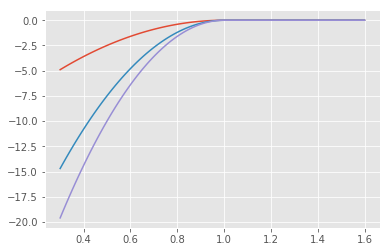

In [24]:
r_values = np.linspace(0.3, 1.6, 100)
muA = 0.0
muR = 10.0
rR = 1.0
plt.plot(r_values, piecewise_polynomial(r_values, muA=muA, muR=muR, rR=rR), 
         r_values, piecewise_polynomial(r_values, muA=muA, muR=30.0, rR=rR),
          r_values, piecewise_polynomial(r_values, muA=muA, muR=40.0, rR=rR) 
        )

I visually inspected the columns for these muR values and one can't really see a difference. So I've decided to go with muR=12.0 because then for t=35h the columns have a relative height of over 0.8 and for t=40 they have a relative height of over 0.9. (Yes these are magic numbers.)

You can generate a png visualizing clonal patches using

In [7]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/dev-setup_experiments/0/

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/dev-setup_experiments/0/


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

And render the png using

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

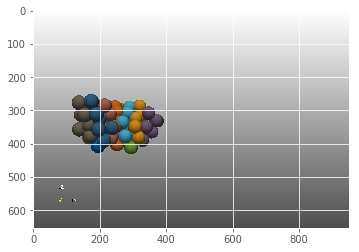

In [15]:
image = mpimg.imread("/home/kubuntu1804/Documents/sf_simulation_results/dev-setup_experiments/0/patches_t40.png")
plt.imshow(image)